In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
import string

In [2]:
url = "https://www.themoscowtimes.com/"

#News:
response = requests.get(url+"news")
soup = BeautifulSoup(response.text, "html.parser")
titles_container = soup.findAll('h3', {'class': 'article-excerpt-default__headline'})

titles_info = [title.text for title in titles_container]

In [3]:
#News+Opinion:
response = requests.get(url+"opinion")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [4]:
#News+Opinion+Business:
response = requests.get(url+"business")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [5]:
#News+Opinion+Business+ArtAndLife:
response = requests.get(url+"arts-and-life")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [6]:
#News+Opinion+Business+ArtAndLife+Meanwhile:
response = requests.get(url+"meanwhile")
titles_info = str(titles_info) + str([title.text for title in titles_container]) #Final str

pprint(titles_info)

("['Russia to Suspend Georgian Flights to Russia Starting July 8', 'Putin "
 "Suspends Passenger Flights From Russia to Georgia', 'Russia Will Help Iran "
 "With Oil If Payment Channel Not Launched, Official Says', 'Russians Are "
 "Losing Interest in Foreign Policy, Poll Says', 'Russian Hermit Seeks Peace "
 "in Remote Siberia', 'Georgian Parliament Leader Resigns Over Mass "
 "Anti-Russian Protests', 'Russia Accuses U.S. of Pushing Iran Situation to "
 "Brink of War', 'Chechen Human Rights Leader Titiyev Released From Prison, 18 "
 "Months After Arrest', '‘Russia Is Our Enemy’: The Reactions to Anti-Russian "
 "Protests in Georgia', 'EU Extends Economic Sanctions on Russia Until 2020', "
 '"Georgians Angry Over Russian Lawmaker\'s Visit Try to Storm Parliament", '
 "'‘Like Pre-Revolutionary Pogroms’: Ethnic Conflicts on the Rise in Russia', "
 "'Crowds of Protesters Set Up Camp Against Landfill in Russia’s North', "
 "'Russia Starts Freeing Captive Belugas From ‘Whale Prison,’ Report

In [7]:
#Clean punctuation:
def replace_punctuation (text, replace):
      return re.sub("[%s]" % re.escape(string.punctuation), replace, text)

titles_info = replace_punctuation(str(titles_info), "")

#Clean other chars:
titles_info = titles_info.replace("’", "").replace("‘", "").replace("'", "").replace("\n","").replace("\t","").replace("\\ ", "")

#Lower case:
titles_info = titles_info.lower()

In [8]:
#Token list:
words = nltk.tokenize.word_tokenize(titles_info)

#Stopwords list:
stopwords = nltk.corpus.stopwords.words("english") 

#FreqDist:
words_except_stop_dist = nltk.FreqDist(word for word in words if word not in stopwords)

Top 15 frequencies, excluding stopwords:
---------------------------------------------
           Word  Frequency
0        russia         46
1          says         16
2         putin         15
3      georgian         10
4       flights         10
5       georgia         10
6          iran         10
7      russians         10
8       russian         10
9    parliament         10
10       leader         10
11  antirussian         10
12     protests         10
13       prison         10
14           eu         10
---------------------------------------------


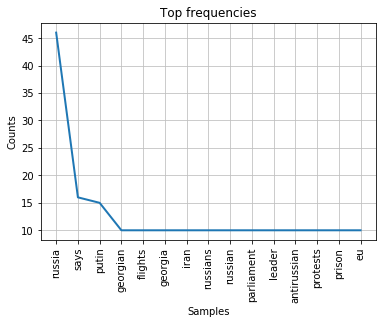

In [9]:
#Results:
top = 15
results = pd.DataFrame(words_except_stop_dist.most_common(top), columns = ["Word", "Frequency"]) # DF Most common 

print("Top", top, "frequencies, excluding stopwords:")
print("-" * 45)
print(results)
print("-" * 45)

words_except_stop_dist.plot(top, title="Top frequencies") #Graph

In [10]:
#results.drop(results[results.Word == "russia"].index, inplace = True)
#results.drop(results[results.Word == "russians"].index, inplace = True)
#results.drop(results[results.Word == "russian"].index, inplace = True)
#results.drop(results[results.Word == "says"].index, inplace = True)

In [11]:
#Word tags: https://www.sketchengine.eu/penn-treebank-tagset/
word_tags = nltk.pos_tag(words_except_stop_dist) #Return list

word_tags = pd.DataFrame(word_tags)

word_tags.head(15)

#Iran != VB!!

,0,1
0,russia,NN
1,suspend,NN
2,georgian,JJ
3,flights,NNS
4,starting,VBG
5,july,NN
6,8,CD
7,putin,NN
8,suspends,NNS
9,passenger,NN


In [12]:
#How many verbs:
word_tags[(word_tags[1] == re.match(r"VB?\w+", word_tags[1]))]

TypeError: expected string or bytes-like object